<a href="https://colab.research.google.com/github/PomesHouse/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/ch01_07_CNN%EA%B8%B0%EC%B4%88_Pooling_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01.07 CNN기초 - Pooling Layer
---

* 날짜:
* 이름:

## 학습내용
    - CNN의 개념을 이해한다.
    - 텐서플로우를 이용해 CNN을 구성한다.
    - CNN 모델을 이용해 손글씨 이미지를 분류한다.
    - CNN의 feature map에 대해 이해한다.

## 데이터셋

* MNIST

```
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
```

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Pooling layer
---

풀링(Pooling) 연산은 커널과 스트라이드 개념이 존재한다는 점에서 합성곱 연산과 유사하지만, 학습해야 할 가중치가 없으며 연산 후에 채널 수가 변하지 않습니다. 일반적으로 합성곱 층(합성곱 연산 + 활성화 함수) 다음에는 풀링 층을 추가하는 것이 일반적입니다. 


In [2]:
 from tensorflow.keras.layers import MaxPool2D, AvgPool2D

### **| 맥스 풀링(Max Pooling)**
맥스풀링은 이미지 영역의 최대값 만을 출력값으로 가지는 연산 방법입니다. 



<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0107-01.PNG?raw=true width=400>
</p>



In [3]:
x = np.array([1,0,1,1,1,2,0,0,1,0,1,0,0,0,1,1], dtype = 'float16').reshape(1, 4, 4, 1)
print(x[0, :, :, 0], x.shape)
y = MaxPool2D(pool_size = 2, strides = 1)(x) # kernel_size = pool_size 
# input shape = (n, w, h, ch) (conv2d 처럼)
print(y[0, :, :, 0],y.shape)

[[1. 0. 1. 1.]
 [1. 2. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 1. 1.]] (1, 4, 4, 1)
tf.Tensor(
[[2. 2. 1.]
 [2. 2. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32) (1, 3, 3, 1)


### **| 평균 풀링(Average Pooling)**


평균풀링은 이미지 영역의 평균값 을 출력값으로 가지는 연산 방법입니다. 


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0107-02.PNG?raw=true width=400>
</p>





In [4]:
x = np.array([1,0,1,1,1,2,0,0,1,0,1,0,0,0,1,1], dtype = 'float16').reshape(1, 4, 4, 1)
print(x[0, :, :, 0], x.shape)
y = AvgPool2D(pool_size = 2, strides = 1)(x) # kernel_size = pool_size 
# input shape = (n, w, h, ch) (conv2d 처럼)
print(y[0, :, :, 0],y.shape)

[[1. 0. 1. 1.]
 [1. 2. 0. 0.]
 [1. 0. 1. 0.]
 [0. 0. 1. 1.]] (1, 4, 4, 1)
tf.Tensor(
[[1.   0.75 0.5 ]
 [1.   0.75 0.25]
 [0.25 0.5  0.75]], shape=(3, 3), dtype=float32) (1, 3, 3, 1)


## LeNet-5
---

LeNet-5[(논문)](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) 구조는 아마도 가장 널리 알려진 CNN 구조일 것입니다. 이 구조는 1998년 얀 르쿤이 만들었으며 손글씨 숫자 인식(MNIST)에 널리 사용되었습니다. 


![](https://www.datasciencecentral.com/wp-content/uploads/2021/10/1lvvWF48t7cyRWqct13eU0w.jpeg)

### | LeNet-5을 이용한 손글씨 이미지 분류

####  **데이터 준비**

In [5]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 전처리 - 정규화
x_train, x_test = x_train/255., x_test/255
# 전처리 - shape 맞추기 
x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


#### **모델 구성**

In [6]:
from tensorflow.keras import layers, models, utils

def build_lenet5():
    x = layers.Input(shape = (28, 28, 1))
    y = layers.Conv2D(filters = 6, kernel_size = 5 , padding = 'same', activation = 'tanh')(x)
    y = layers.AvgPool2D( # pooling 레이어에서는 filters 없어서, 채널 조정 불가 
                         pool_size = 2, # 보통 2로 준다 
                         strides = 2,)(y)
    y = layers.Conv2D(16, 5, padding = 'valid', activation = 'tanh')(y)
    y = layers.MaxPool2D(2, 2)(y)
    
    y = layers.Flatten()(y)
    y = layers.Dense(120, activation = 'tanh')(y)
    y = layers.Dense(84, activation = 'tanh')(y)
    y = layers.Dense(10, activation = 'softmax')(y)
    model = tf.keras.models.Model(x, y)
    return model

#### **학습 및 평가**

In [7]:
model = build_lenet5()
model.summary()
model.compile(optimizer = 'sgd',   # stochastic gradient descent (배치개수에 한번씩 업데이트)
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 10)
print('----------------- 테스트 스코어 -----------------')
model.evaluate(x_test, y_test, )

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_1 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0     

[0.04563242197036743, 0.9857000112533569]

### **| Feature map**

#### **feature map 얻기**

In [14]:
# for layer in model.layers:
#     print(layer, layer.output)
layer_outputs = [layer.output for layer in model.layers] # 레이어의 아웃풋 = 데이터 변환과정 
model_output_by_layer = models.Model(inputs = model.input, outputs = layer_outputs) # 모든 레이어의 아웃풋 획득 가능 
print(len(layer_outputs))
x_pred_maps = model_output_by_layer(x_test)
for x_pred_map in x_pred_maps:
    print(x_pred_map.shape)
cnn_layers = [1, 2, 3, 4,]
dnn_layers = [5, 6, 7, 8]

9
(10000, 28, 28, 1)
(10000, 28, 28, 6)
(10000, 14, 14, 6)
(10000, 10, 10, 16)
(10000, 5, 5, 16)
(10000, 400)
(10000, 120)
(10000, 84)
(10000, 10)


#### **시각화**

![](https://www.datasciencecentral.com/wp-content/uploads/2021/10/1lvvWF48t7cyRWqct13eU0w.jpeg)

[시각화 함수 스크립트](https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/scripts/featuremap_dict.py)

1 번째 Convolutional 레이어 (28, 28, 6)


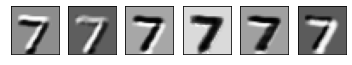

2 번째 Convolutional 레이어 (14, 14, 6)


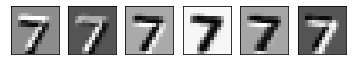

3 번째 Convolutional 레이어 (10, 10, 16)


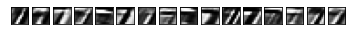

4 번째 Convolutional 레이어 (5, 5, 16)


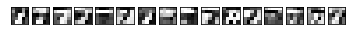

5 번째 Dense 레이어 (400,)


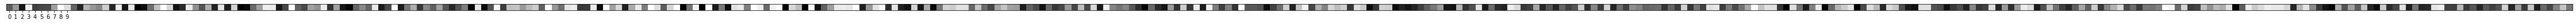

6 번째 Dense 레이어 (120,)


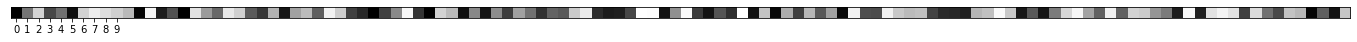

7 번째 Dense 레이어 (84,)


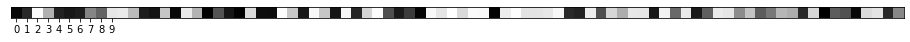

8 번째 Dense 레이어 (10,)


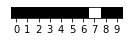

In [15]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

def show_featuremap(sample_idx, fmaps, cnn_idxs, flatten_idxs):
  for idx in cnn_idxs:
    fmap = fmaps[idx][sample_idx]
    chs = fmap.shape[2]
    print(f'{idx} 번째 Convolutional 레이어 {fmap.shape}')
    for ch in range(chs):
      plt.subplot(1,chs,ch+1)
      plt.imshow(fmap[:,:,ch], cmap='gray')
      plt.xticks([]);plt.yticks([])
    plt.show()

  for idx in flatten_idxs:
    fmap = fmaps[idx][sample_idx]
    print(f'{idx} 번째 Dense 레이어 {fmap.shape}')
    plt.figure(figsize=(int(len(fmap)/5),10))
    plt.imshow(tf.reshape(fmap,(1,len(fmap))), cmap='gray')
    plt.xticks(range(10));plt.yticks([]);plt.show()


sample_idx = 0
show_featuremap(sample_idx, x_pred_maps, cnn_layers, dnn_layers)

## 과제 1. 의류 이미지 분류
---
* 데이터셋 : f-minst(fashoin mnist)
* 데이터를 소개하세요.
    * 60,000 training dataset
    * 10,000 test dataset 
    * 28×28 pixel grayscale images of items 
    ```
    0: T-shirt/top
    1: Trouser
    2: Pullover
    3: Dress
    4: Coat
    5: Sandal
    6: Shirt
    7: Sneaker
    8: Bag
    9: Ankle boot
    ```
* 데이터의 형태를 파악하세요
* 적절한 모델을 생성하세요
* 데이터에 적합하게 학습을 진행하세요.

In [37]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

train shape: X=(60000, 28, 28), y=(60000,)
test shape: X=(10000, 28, 28), y=(10000,)


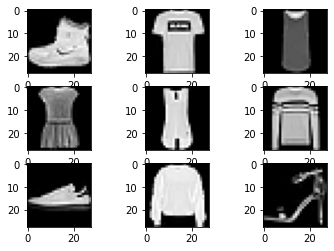

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)
(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


In [38]:
# summarize loaded dataset
print('train shape: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('test shape: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape) 
# (60000, 28, 28) (10000, 28, 28) (60000,) (10000,)

# 전처리 - 정규화
x_train, x_test = x_train/255., x_test/255.
# 전처리 - shape 맞추기
x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape) 
# (60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)

In [39]:
from tensorflow.keras import models, utils
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, MaxPool2D, AvgPool2D

def build_fmnist():
    x = Input(shape = (28, 28, 1))
    y = Conv2D(6, 5, padding = 'same', activation = 'relu')(x)
    y = AvgPool2D(2, 2, 'same')(y)
    y = Conv2D(16, 5, padding = 'valid', activation = 'relu')(y)
    y = MaxPool2D(2, 2, padding = 'same')(y)

    y = Flatten()(y)
    y = Dense(120, activation = 'relu')(y)
    y = Dense(84, activation = 'relu')(y)
    y = Dense(10, activation = 'softmax')(y)
    model = models.Model(x, y)
    return model

model = build_fmnist()
model.summary()


Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_7 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_12 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 400)               0   

In [40]:
model.compile(optimizer = 'sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 10)
print('=== 테스트 스코어 ===')
model.evaluate(x_test, y_test)
# 활성화 함수를 'tanh' 로 했을 때 
# loss: 0.7400 - accuracy: 0.7201
# 활성화 함수를 'relu' 로 했을 때 
# loss: 0.3517 - accuracy: 0.8725

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8338 - accuracy: 0.6977
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5283 - accuracy: 0.8069
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4657 - accuracy: 0.8296
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4276 - accuracy: 0.8440
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3995 - accuracy: 0.8537
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3809 - accuracy: 0.8611
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3619 - accuracy: 0.8677
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3492 - accuracy: 0.8725
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3363 - accuracy: 0.8768
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.326

[0.3517269194126129, 0.8725000023841858]

9
(10000, 28, 28, 1)
(10000, 28, 28, 6)
(10000, 14, 14, 6)
(10000, 10, 10, 16)
(10000, 5, 5, 16)
(10000, 400)
(10000, 120)
(10000, 84)
(10000, 10)
1 번째 Convolutional 레이어 (28, 28, 6)


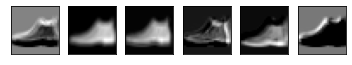

2 번째 Convolutional 레이어 (14, 14, 6)


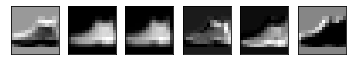

3 번째 Convolutional 레이어 (10, 10, 16)


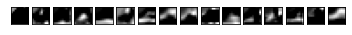

4 번째 Convolutional 레이어 (5, 5, 16)


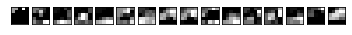

5 번째 Dense 레이어 (400,)


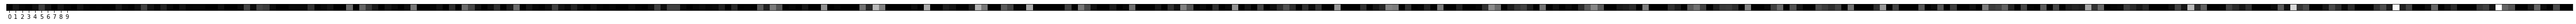

6 번째 Dense 레이어 (120,)


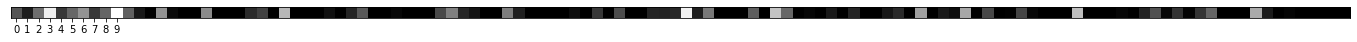

7 번째 Dense 레이어 (84,)


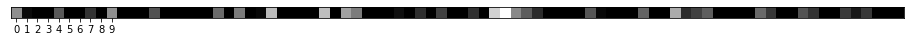

8 번째 Dense 레이어 (10,)


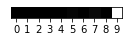

In [41]:
# for layer in model.layers:
#     print(layer, layer.output)
layer_outputs = [layer.output for layer in model.layers] # 레이어의 아웃풋 = 데이터 변환과정 
model_output_by_layer = models.Model(inputs = model.input, outputs = layer_outputs) # 모든 레이어의 아웃풋 획득 가능 
print(len(layer_outputs))
x_pred_maps = model_output_by_layer(x_test)
for x_pred_map in x_pred_maps:
    print(x_pred_map.shape)
cnn_layers = [1, 2, 3, 4,]
dnn_layers = [5, 6, 7, 8]

import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

def show_featuremap(sample_idx, fmaps, cnn_idxs, flatten_idxs):
  for idx in cnn_idxs:
    fmap = fmaps[idx][sample_idx]
    chs = fmap.shape[2]
    print(f'{idx} 번째 Convolutional 레이어 {fmap.shape}')
    for ch in range(chs):
      plt.subplot(1,chs,ch+1)
      plt.imshow(fmap[:,:,ch], cmap='gray')
      plt.xticks([]);plt.yticks([])
    plt.show()

  for idx in flatten_idxs:
    fmap = fmaps[idx][sample_idx]
    print(f'{idx} 번째 Dense 레이어 {fmap.shape}')
    plt.figure(figsize=(int(len(fmap)/5),10))
    plt.imshow(tf.reshape(fmap,(1,len(fmap))), cmap='gray')
    plt.xticks(range(10));plt.yticks([]);plt.show()


sample_idx = 0
show_featuremap(sample_idx, x_pred_maps, cnn_layers, dnn_layers)

## 과제 2. 동물 및 물체 이미지 분류
---
* 데이터셋 : cifar-10
* 데이터의 형태를 파악하세요
    * 50,000 training images, 10,000 test images
    * 32x32 color images
    * 10 categories.
```
0	airplane
1	automobile
2	bird
3	cat
4	deer
5	dog
6	frog
7	horse
8	ship
9	truck
```
* 적절한 모델을 생성하세요
* 데이터를 학습하세요.

In [59]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets.cifar10 import load_data

(x_train, y_train), (x_test, y_test) = load_data()

train shape: X=(50000, 32, 32, 3), y=(50000, 1)
test shape: X=(10000, 32, 32, 3), y=(10000, 1)


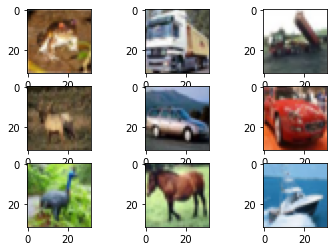

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


In [60]:
# summarize loaded dataset
print('train shape: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('test shape: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i],) # cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape) 
# (50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1),  (10000, 1)

# 전처리 - 정규화
x_train, x_test = x_train/255., x_test/255.

In [61]:
from tensorflow.keras import models, utils
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, MaxPool2D, AvgPool2D

def build_fmnist():
    x = Input(shape = (32, 32, 3))
    y = Conv2D(6, 5, padding = 'same', activation = 'tanh')(x)
    y = AvgPool2D(2, 2, 'same')(y)
    y = Conv2D(16, 5, padding = 'valid', activation = 'tanh')(y)
    y = MaxPool2D(2, 2, padding = 'same')(y)

    y = Flatten()(y)
    y = Dense(120, activation = 'tanh')(y)
    y = Dense(84, activation = 'tanh')(y)
    y = Dense(10, activation = 'softmax')(y)
    model = models.Model(x, y)
    return model

model = build_fmnist()
model.summary()


Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d_11 (Avera  (None, 16, 16, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_20 (Conv2D)          (None, 12, 12, 16)        2416      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 16)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 576)               0  

In [62]:
model.compile(optimizer = 'adam', #'sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 10)
print('=== 테스트 스코어 ===')
model.evaluate(x_test, y_test)
# 최적화 함수를 'sgd' 로 했을 때 
# loss: 1.1419 - accuracy: 0.5992
# 최적화 함수를 'adam'으로 했을 때 
# loss: 1.1316 - accuracy: 0.6294
# test set 의 결과가 loss: 0.6996 - accuracy: 0.7566 인것을 생각하면 이 경우에는 overfitting이 문제일 수 있다. 

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5516 - accuracy: 0.4462
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2602 - accuracy: 0.5553
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1336 - accuracy: 0.6028
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0485 - accuracy: 0.6330
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9733 - accuracy: 0.6583
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9129 - accuracy: 0.6821
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8509 - accuracy: 0.7024
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7970 - accuracy: 0.7232
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7484 - accuracy: 0.7392
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.699

[1.131628394126892, 0.6294000148773193]

9
(10000, 32, 32, 3)
(10000, 32, 32, 6)
(10000, 16, 16, 6)
(10000, 12, 12, 16)
(10000, 6, 6, 16)
(10000, 576)
(10000, 120)
(10000, 84)
(10000, 10)
1 번째 Convolutional 레이어 (32, 32, 6)


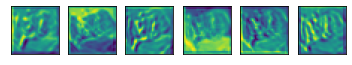

2 번째 Convolutional 레이어 (16, 16, 6)


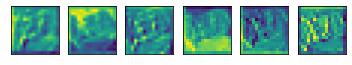

3 번째 Convolutional 레이어 (12, 12, 16)


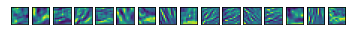

4 번째 Convolutional 레이어 (6, 6, 16)


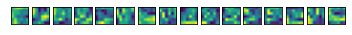

5 번째 Dense 레이어 (576,)


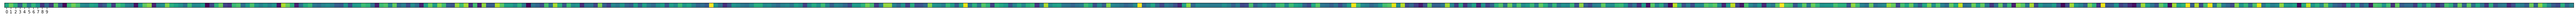

6 번째 Dense 레이어 (120,)


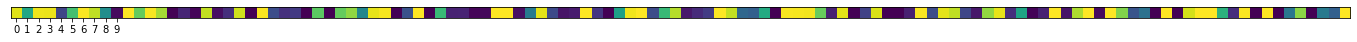

7 번째 Dense 레이어 (84,)


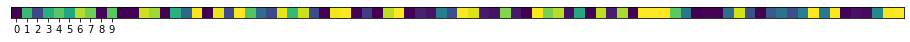

8 번째 Dense 레이어 (10,)


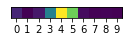

In [64]:
# for layer in model.layers:
#     print(layer, layer.output)
layer_outputs = [layer.output for layer in model.layers] # 레이어의 아웃풋 = 데이터 변환과정 
model_output_by_layer = models.Model(inputs = model.input, outputs = layer_outputs) # 모든 레이어의 아웃풋 획득 가능 
print(len(layer_outputs))
x_pred_maps = model_output_by_layer(x_test)
for x_pred_map in x_pred_maps:
    print(x_pred_map.shape)
cnn_layers = [1, 2, 3, 4,]
dnn_layers = [5, 6, 7, 8]

import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

def show_featuremap(sample_idx, fmaps, cnn_idxs, flatten_idxs):
  for idx in cnn_idxs:
    fmap = fmaps[idx][sample_idx]
    chs = fmap.shape[2]
    print(f'{idx} 번째 Convolutional 레이어 {fmap.shape}')
    for ch in range(chs):
      plt.subplot(1,chs,ch+1)
      plt.imshow(fmap[:,:,ch])
      plt.xticks([]);plt.yticks([])
    plt.show()

  for idx in flatten_idxs:
    fmap = fmaps[idx][sample_idx]
    print(f'{idx} 번째 Dense 레이어 {fmap.shape}')
    plt.figure(figsize=(int(len(fmap)/5),10))
    plt.imshow(tf.reshape(fmap,(1,len(fmap))))
    plt.xticks(range(10));plt.yticks([]);plt.show()

sample_idx = 0
show_featuremap(sample_idx, x_pred_maps, cnn_layers, dnn_layers)


In [ ]:
# 정답은 고양이인데, 오답이 나왔다.